In [ ]:
%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

  Using cached numpy-2.2.6-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.5 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 77.1 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]ow]
Note: you may need to restart the kernel to use updated packages.


In [58]:
def step_function(x):
	return 1 if x >= 0 else 0

def perceptron(X, y, n_iter=1000, lr=0.1):
	n_samples, n_features = X.shape
	weights = np.random.rand(n_features)
	bias = np.random.rand()
	errors = []

	for _ in range(n_iter):
		error_count = 0
		for xi, target in zip(X, y):
			output = step_function(np.dot(xi, weights) + bias)
			error = target - output
			if error != 0:
				weights += lr * error * xi
				bias += lr * error
				error_count += 1
		errors.append(error_count)
	return weights, bias, errors

def generate_data(n, func_type='AND'):
	X = np.array([[int(i & (1 << j) > 0) for j in range(n)] for i in range(2**n)])
	if func_type == 'AND':
		y = np.array([1 if np.all(x) else 0 for x in X])
	elif func_type == 'OR':
		y = np.array([1 if np.any(x) else 0 for x in X])
	elif func_type == 'XOR':
		y = np.array([1 if sum(x) % 2 == 1 else 0 for x in X])
	return X, y

def plot_hyperplane(X, y, weights, bias, func_type):
	for xi, yi in zip(X, y):
		color = 'red' if yi == 0 else 'green'
		plt.scatter(xi[0], xi[1], color=color)

	x_vals = np.linspace(-0.1, 1.1, 100)
	y_vals = -(weights[0] * x_vals + bias) / weights[1]
	plt.plot(x_vals, y_vals, '--k', label='Decision Boundary')

	plt.xlabel("x1")
	plt.ylabel("x2")
	plt.title(f"Hyperplane for {func_type} using Perceptron")
	plt.legend()
	plt.grid(True)
	plt.axis('equal')
	plt.show()

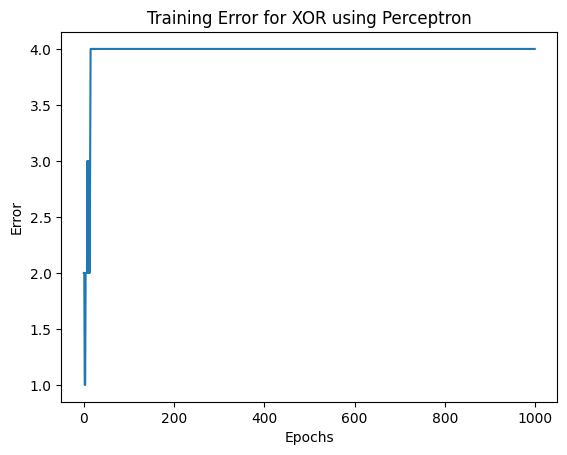

[[0 0]
 [1 0]
 [0 1]
 [1 1]] [0 1 1 0]


In [63]:
n = 2
func_type='XOR'

X, y = generate_data(n, func_type)
weights, bias, errors = perceptron(X, y,1000)

# Visualizar a evolução dos erros
plt.plot(errors)
plt.title(f'Training Error for {func_type} using Perceptron')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

print(X, y)

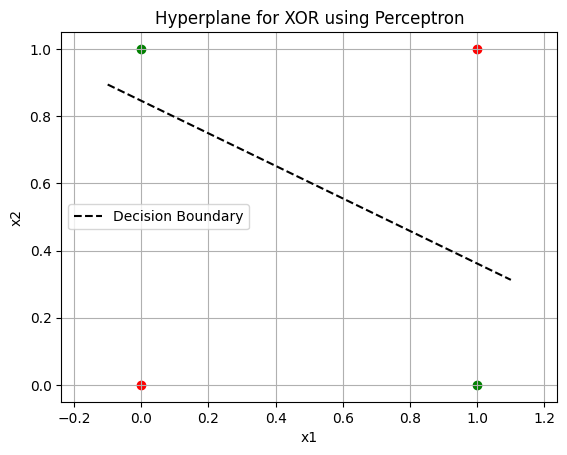

Final Weights: [-0.01536441 -0.0317142 ]
Final Bias: 0.02681797537029476


In [64]:
plot_hyperplane(X, y, weights, bias, func_type)
print(f"Final Weights: {weights}")
print(f"Final Bias: {bias}")